In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

#Setting the properties to personal preference
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams["figure.figsize"] = (8,4)
warnings.filterwarnings("ignore")    # No major warnings came out on first run. So, I am ignoring the "deprecation" warnings instead of showing them the first time to keep the code clean


print(os.listdir("../input"))
df = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']


In [99]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '], dtype='object')

In [100]:
df.drop('Serial No.', inplace=True, axis=1)
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

Let's check what the raw data looks like. 

In [101]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


>Data looks pretty clean and in the right data type format.

In [103]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


>Lot of "cool" info from the .describe(). Let's dive deeper and see this info for each "University Rating"

In [104]:
for rating in sorted(df['University Rating'].unique()):
    print("For University Rating: ", rating, "\n")
    print(df[df['University Rating']==rating].describe(), 2*"\n")

For University Rating:  1 

        GRE Score  TOEFL Score  University Rating        SOP        LOR       CGPA   Research  Chance of Admit
count   34.000000    34.000000               34.0  34.000000  34.000000  34.000000  34.000000        34.000000
mean   304.911765   100.205882                1.0   1.941176   2.426471   7.798529   0.294118         0.562059
std      9.394930     4.903798                0.0   0.715253   0.760107   0.476338   0.462497         0.099446
min    290.000000    92.000000                1.0   1.000000   1.000000   6.800000   0.000000         0.360000
25%    298.250000    98.000000                1.0   1.500000   2.000000   7.470000   0.000000         0.502500
50%    301.500000    99.000000                1.0   2.000000   2.250000   7.740000   0.000000         0.570000
75%    312.000000   101.750000                1.0   2.375000   3.000000   8.010000   1.000000         0.607500
max    332.000000   112.000000                1.0   3.500000   4.000000   9.120000  

>Surprising to see that even at the highest rated universities the students with GRE score as low as 303 have 61% chance of admitting in.
Let's do some more EDA to dissect the data.

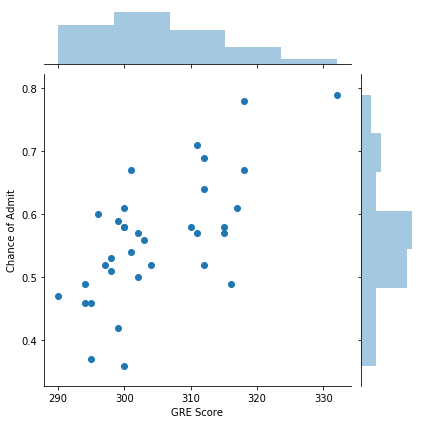

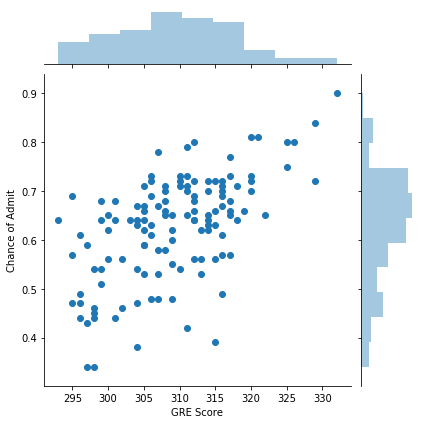

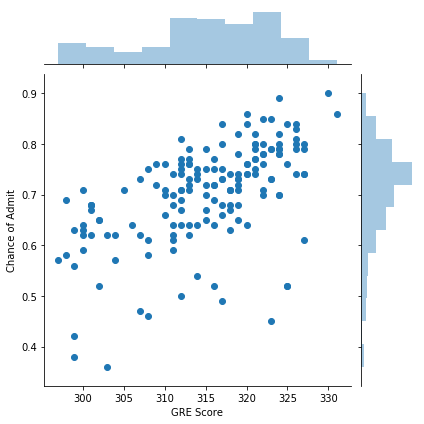

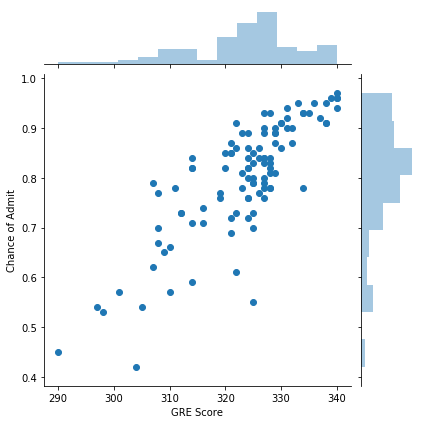

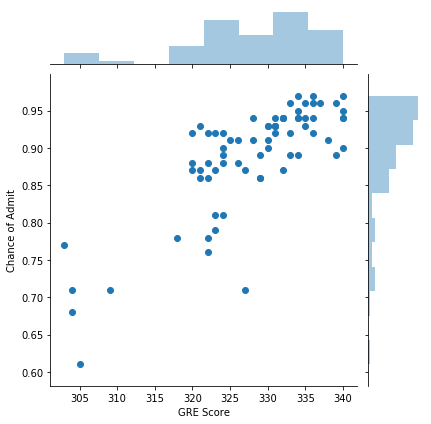

In [105]:
for rating in sorted(df['University Rating'].unique()):
    sns.jointplot(data=df[df['University Rating']==rating], x = 'GRE Score', y = 'Chance of Admit')
plt.show()

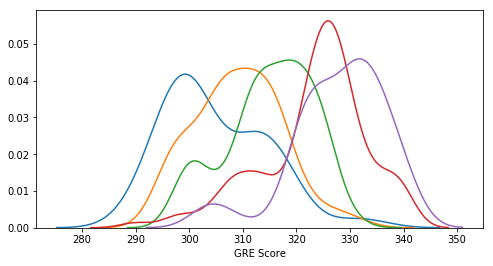

In [106]:
for rating in sorted(df['University Rating'].unique()):
    sns.distplot(df[df['University Rating']==rating]['GRE Score'], hist=False)
plt.show()

>'GRE Score' "seems" to be a pretty good indicator for Chances of getting in.
Let's create a heatmap to confirm our hypothesis.

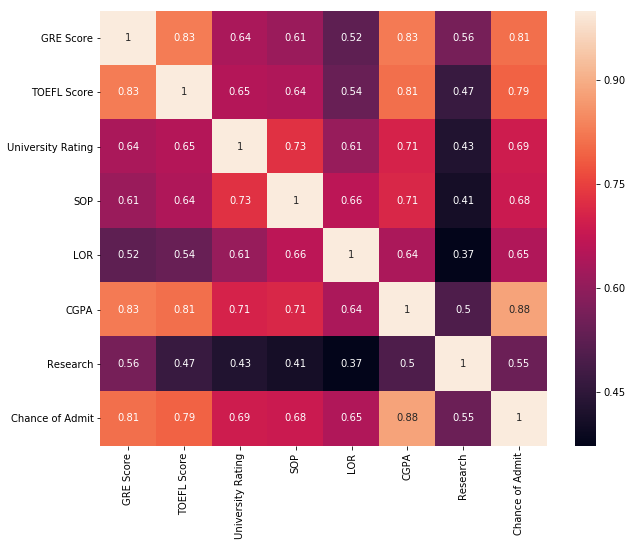

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

> Top 3 factors that influence the Chances of Admit are **'CGPA', 'GRE Score', 'TOEFL Score'** in that order.

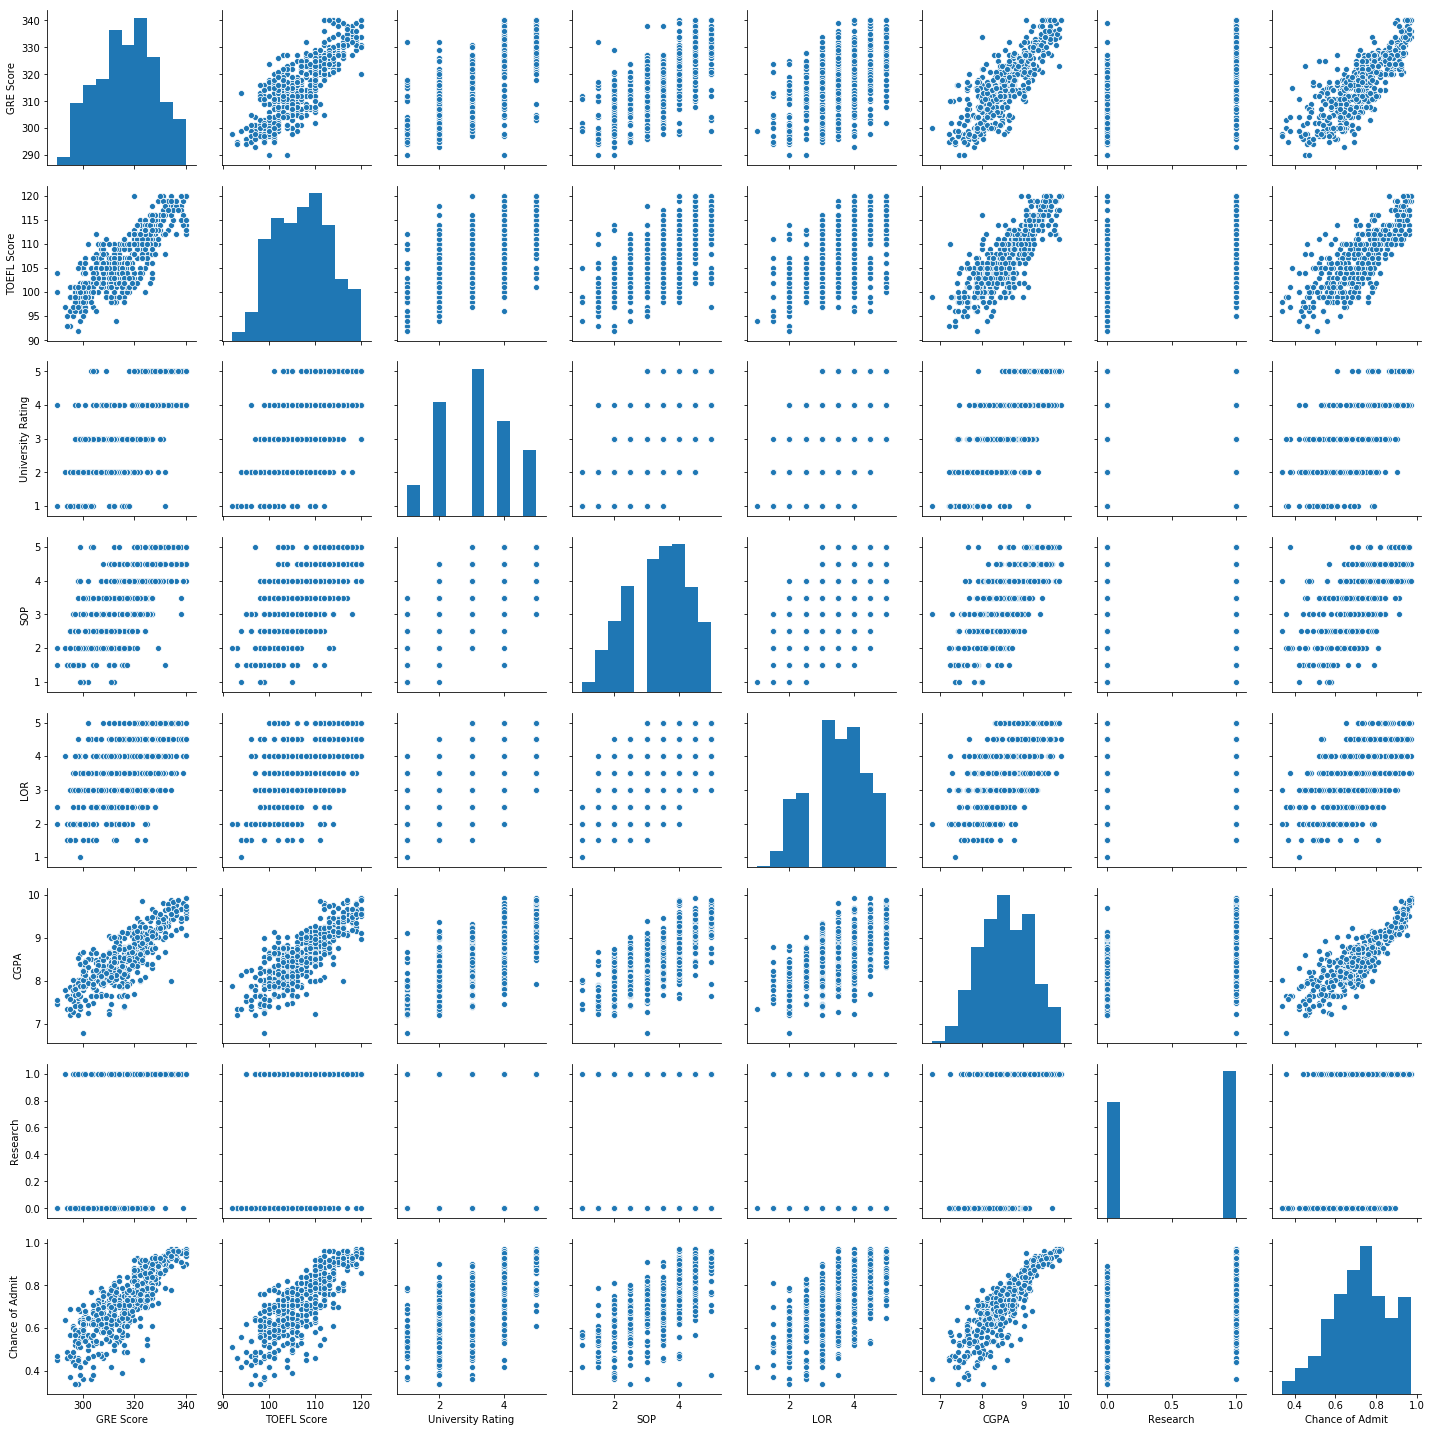

In [108]:
sns.pairplot(df)

## Time to implement some Machine Learning to predict 'Chance of Admit'. 

Looking at the heatmap (above), it seems like there are multiple factors affecting the 'Chance of Admit'. So, let's start with Logistic Regression and compare the accuracy to that of SVM's

## Logistic Regression

In [109]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
y = df['Chance of Admit']
X = df[features]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
y_train_label = [1 if each > 0.8 else 0 for each in y_train]
y_test_label  = [1 if each > 0.8 else 0 for each in y_test]

> I am using 80% 'Chance of Admit' as my cut off point to change Chance of Admit from float to binary labels.

In [112]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train, y_train_label)
predictions = lg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_label, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       121
           1       0.83      0.86      0.84        44

    accuracy                           0.92       165
   macro avg       0.89      0.90      0.89       165
weighted avg       0.92      0.92      0.92       165



> 92% overall accuracy seems fine. Let's try SVM now.

## Support Vector Machine (SVM)

In [113]:
# We have labels already in memory from our Logistic Regression model.
from sklearn.svm import SVC
svmmodel = SVC()
svmmodel.fit(X_train,y_train_label)
y_pred_svm = svmmodel.predict(X_test)

print(classification_report(y_test_label, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       121
           1       0.93      0.86      0.89        44

    accuracy                           0.95       165
   macro avg       0.94      0.92      0.93       165
weighted avg       0.95      0.95      0.94       165



> 95% accuracy!!! Better than our Logistic Regression model. 
LR is more sensitive to outliers than SVM because the cost function of LR diverges faster than those of SVM. That might be the reason why SVM is giving a better accuracy than Logistic Regression. 